<a href="https://colab.research.google.com/github/dmschauer/Google-Colab-Notebooks/blob/master/StyleGAN2_My_Face_Morph_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

Generative Adversarial Networks (GANs) are a relatively new concept in the field of Deep Learning. GANs are used to create artificial samples of images that are often indistinguishable from the original images. It was introduced in 2014 and since then, it has seen a significant improvement in its performance. They have become more realistic with time and their accuracy has increased to such a level that it is now next to impossible for a person to identify whether this is an image of a real person or if it is generated by neural networks or GANs.

To spice up the things little more, check these 2 websites and see whether we can identify the real person or not. We bet, it will be difficult for you to separate the original images and the generated images.

1. Which Face is real? http://www.whichfaceisreal.com/
2. This person does not exist https://www.thispersondoesnotexist.com/


In this article, we will be talking about StyleGAN2, which is a type of GAN which was released at the beginning of 2020. This model is proposed by NVIDIA and it can achieve excellent results. It has also its predecessor known as StyleGAN1, however, we will keep our discussion and hands-on-coding limited to StyleGAN2. It generates artificial images starting from a very low resolution, scaling it up to a resolution of 1024x1024. It can control features like face shape, nose placement, etc to fine details like hair color and face tone, etc.
Enough said we will not get the hang of this brilliant model until and unless we try out the code ourselves.

Before moving forward, there are some prerequisites which we need to ensure before moving forward
This model only runs on GPU and it doesn’t have CPU support. So, we will recommend trying this thing out in Google Colab by changing the runtime to GPU.
Also, this model only supports Tensorflow 1.x. If you are trying this out on Google Coab, we need to know that by default it runs on Tensorflow 2.x. So, we need to explicitly change the version of TensorFlow.

Once, we have made sure we are following the above steps, we are good to go.

First, we need to mount our Google Drive to store the generated images. Also, we will explicitly mention that we will be using TensorFlow 1.x version. All of this can be done via this piece of code.


First, specify that we will be using TensorFlow 1.x. Google Colab makes this really easy. If you are working on your own machine, you would have to do the installation yourself. For example, if you already have TensorFlow 2.x installed, you could created a separate environment, activate it and install 1.x there.

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Later we will need GPU acceleration. To confirm, you are using a GPU in your Colab session, run the following code. You might get an error that says 'SystemError: GPU device not found'. 

To fix this:
- navigate to Edit -> Notebook Settings. 
- Select GPU from the Hardware Accelerator drop-down. 
- Save.
- Then try again.

The code should now return 'Found GPU at: /device:GPU:0'

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


The next piece connects your Google Colab notebook via your Google account to your Google Drive. You specify which folder will serve as the mounting point in Google Colab. In my example '/content/drive' is the same as the root directory in my personal Google Drive.

If you run this, you will get a link returned. Follow the link and follow the instructions to mount your Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Hit refresh on the files explorer on the left-side panel. A folder called 'drive' containing the same contents as your Google Drive should show up now.

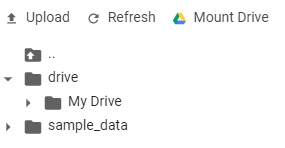

We create a few directories in Google Drive which we will later use.

In [ ]:
!mkdir /content/drive/My\ Drive/Generated_Images

In [ ]:
!mkdir /content/drive/My\ Drive/Mixed_Generated_Images

The next step is cloning the StyleGAN2 Github Repository since it is not available as of now in Google Colab. The following piece of code does this for us.

In [ ]:
!git clone https://github.com/NVlabs/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 93, done.
remote: Total 93 (delta 0), reused 0 (delta 0), pack-reused 93
Unpacking objects: 100% (93/93), done.


Once the repository is cloned, we are good to move ahead.


# Using Command Line in Google Colab


We will be now using the pre-trained model and command line to generate images. We are using a pre-trained model because it is computationally very expensive to train these types of models, however, you are free to do so, if you want. To generate images using the command line in Colab, we use the following piece of code.

This is the first time we actually need a GPU to run it. If you get an error, go back to the start of this notebook and make sure you enabled GPU acceleration in this session as shown above.

In [ ]:
!python /content/stylegan2/run_generator.py generate-images \
    --network=gdrive:networks/stylegan2-ffhq-config-f.pkl \
  --seeds=1215-1230 --truncation-psi=0.5

Local submit - run_dir: results/00000-generate-images
dnnlib: Running run_generator.generate_images() on localhost...
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
Generating image for seed 1215 (0/16) ...
Generating image for seed 1216 (1/16) ...
Generating image for seed 1217 (2/16) ...
Generating image for seed 1218 (3/16) ...
Generating image for seed 1219 (4/16) ...
Generating image for seed 1220 (5/16) ...
Generating image for seed 1221 (6/16) ...
Generating image for seed 1222 (7/16) ...
Generating image for seed 1223 (8/16) ...
Generating image for seed 1224 (9/16) ...
Generating image for seed 1225 (10/16) ...
Generating image for seed 1226 (11/16) ...
Generating image for seed 1227 (12/16) ...
Generating image for seed 1228 (13/16) ...
Generating image for seed 122

You will find the generated images in the folder /content/results/00000-generate-images

Here, we are free to manipulate the seeds parameter in our code. Different seed values will result in different images being generated. Of course, this hints us that the generation process isn't deterministic. Here we used values between 1215-1230 resulting in 16 images. However, you can choose something of your own.

We might now want to take a look at these generated images. We can do so by typing the following piece of code.

In [ ]:
!ls /content/results/00000-generate-images

_finished.txt  seed1217.png  seed1222.png  seed1227.png       submit_config.txt
log.txt        seed1218.png  seed1223.png  seed1228.png
run.txt        seed1219.png  seed1224.png  seed1229.png
seed1215.png   seed1220.png  seed1225.png  seed1230.png
seed1216.png   seed1221.png  seed1226.png  submit_config.pkl


Now, let’s transfer these images to our google drive so that we can finally see what has been generated. This can be achieved by typing this piece of code.


In [ ]:
cp /content/results/00000-generate-images/* /content/drive/My\ Drive/Generated_Images

We then move to our Generated_Images directory in Google Drive to finally see the result.

Below attached is a screen capture from my Google Drive as a lazy visualization method.

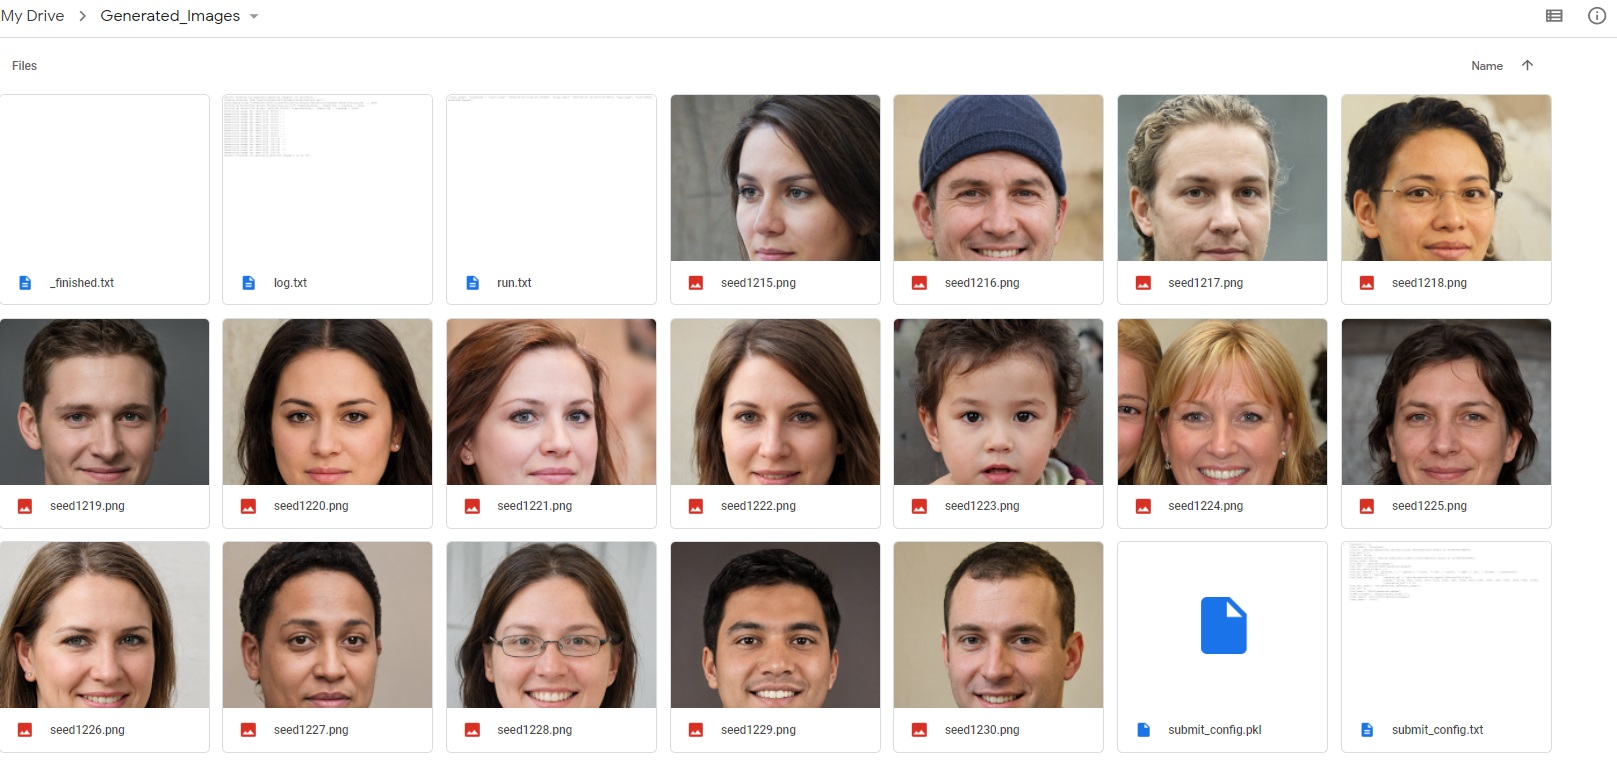

In [ ]:
from IPython.display import Image, display
display(Image('/content/Generated_Images.jpg'))

We now might want to see how StyleGAN2 can mix 2 different images to produce a single image. Remember, all of this is done using the Command Line in Colab. This can be achieved by the following piece of code.

In [ ]:
!python /content/stylegan2/run_generator.py style-mixing-example \
    --network=gdrive:networks/stylegan2-ffhq-config-f.pkl \
  --row-seeds=105,124,80,76,1500 --col-seeds=55,821,1789,293 --truncation-psi=1.0

Local submit - run_dir: results/00001-style-mixing-example
dnnlib: Running run_generator.style_mixing_example() on localhost...
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Generating W vectors...
Generating images...
Generating style-mixed images...
Saving images...
Saving image grid...
dnnlib: Finished run_generator.style_mixing_example() in 53s.


You will find the result in the folder /content/results/00001-style-mixing-example

Again, we can play with the values of row seeds and column seeds to generate different combinations of images. We will now save this generated output to our Google Drive folder Mixed_Generated_Images.


In [ ]:
cp /content/results/00001-style-mixing-example/* /content/drive/My\ Drive/Mixed_Generated_Images

Special attention should be paid to the grid.png. This file summarizes the output of the above code. I downloaded it and converted it to the .jpg format to save about 80% disk space (~6 MB vs. ~36 MB).

You can read it like this when considering the first row and first column as inputs: column B and row 1 result in (the style of) picture B1.

In [ ]:
from IPython.display import Image, display
display(Image('/content/grid.jpg'))

Enough of this working with Command Line. Now, we will write (or rather copy) some piece of code in Python to do the above mentioned task. The copyright of the following code lies with Nvidia because it has been directly taken from their website.


# Generating Images using Python Code

We will import the following libraries

In [ ]:
import sys
sys.path.insert(0, "/content/stylegan2")

import dnnlib

Just copy the below piece of code. We need not change anything here. Credits to Nvidia Corp. This is the code for Generating those images. It basically achieves the same we did in the Colab commandline above.


In [ ]:
import argparse
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import re
import sys

import pretrained_networks

#----------------------------------------------------------------------------

def expand_seed(seeds, vector_size):
  result = []

  for seed in seeds:
    rnd = np.random.RandomState(seed)
    result.append( rnd.randn(1, vector_size) ) 
  return result

def generate_images(Gs, seeds, truncation_psi):
    noise_vars = [var for name, var in Gs.components.synthesis.vars.items() \
                  if name.startswith('noise')]

    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    if truncation_psi is not None:
        Gs_kwargs.truncation_psi = truncation_psi

    for seed_idx, seed in enumerate(seeds):
        print('Generating image for seed %d/%d ...' % (seed_idx, len(seeds)))
        rnd = np.random.RandomState()
        tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
        images = Gs.run(seed, None, **Gs_kwargs) # [minibatch, height, width, channel]
        path = f"/content/drive/My Drive/Generated_Images/image{seed_idx}.png"
        PIL.Image.fromarray(images[0], 'RGB').save(path)

def main():
    sc = dnnlib.SubmitConfig()
    sc.num_gpus = 1
    sc.submit_target = dnnlib.SubmitTarget.LOCAL
    sc.local.do_not_copy_source_files = True
    sc.run_dir_root = "/content/drive/My Drive/Generated_Images"
    sc.run_desc = 'generate-images'
    network_pkl = 'gdrive:networks/stylegan2-ffhq-config-f.pkl'

    print('Loading networks from "%s"...' % network_pkl)
    _G, _D, Gs = pretrained_networks.load_networks(network_pkl)
    vector_size = Gs.input_shape[1:][0]
    seeds = expand_seed( range(8000,8016), vector_size)
    generate_images(Gs, seeds,truncation_psi=0.5)

#----------------------------------------------------------------------------

if __name__ == "__main__":
    main()

Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Generating image for seed 0/16 ...
Generating image for seed 1/16 ...
Generating image for seed 2/16 ...
Generating image for seed 3/16 ...
Generating image for seed 4/16 ...
Generating image for seed 5/16 ...
Generating image for seed 6/16 ...
Generating image for seed 7/16 ...
Generating image for seed 8/16 ...
Generating image for seed 9/16 ...
Generating image for seed 10/16 ...
Generating image for seed 11/16 ...
Generating image for seed 12/16 ...
Generating image for seed 13/16 ...
Generating image for seed 14/16 ...
Generating image for seed 15/16 ...


All we can do is change the range of seeds. We will choose the range of seeds from 8000 to 8016.
When we run this piece of code, the following is what we get.

Let’s just go to our My_StyleGAN2_project folder in Google Drive and see the results.

Following is a screencap of the result we get.


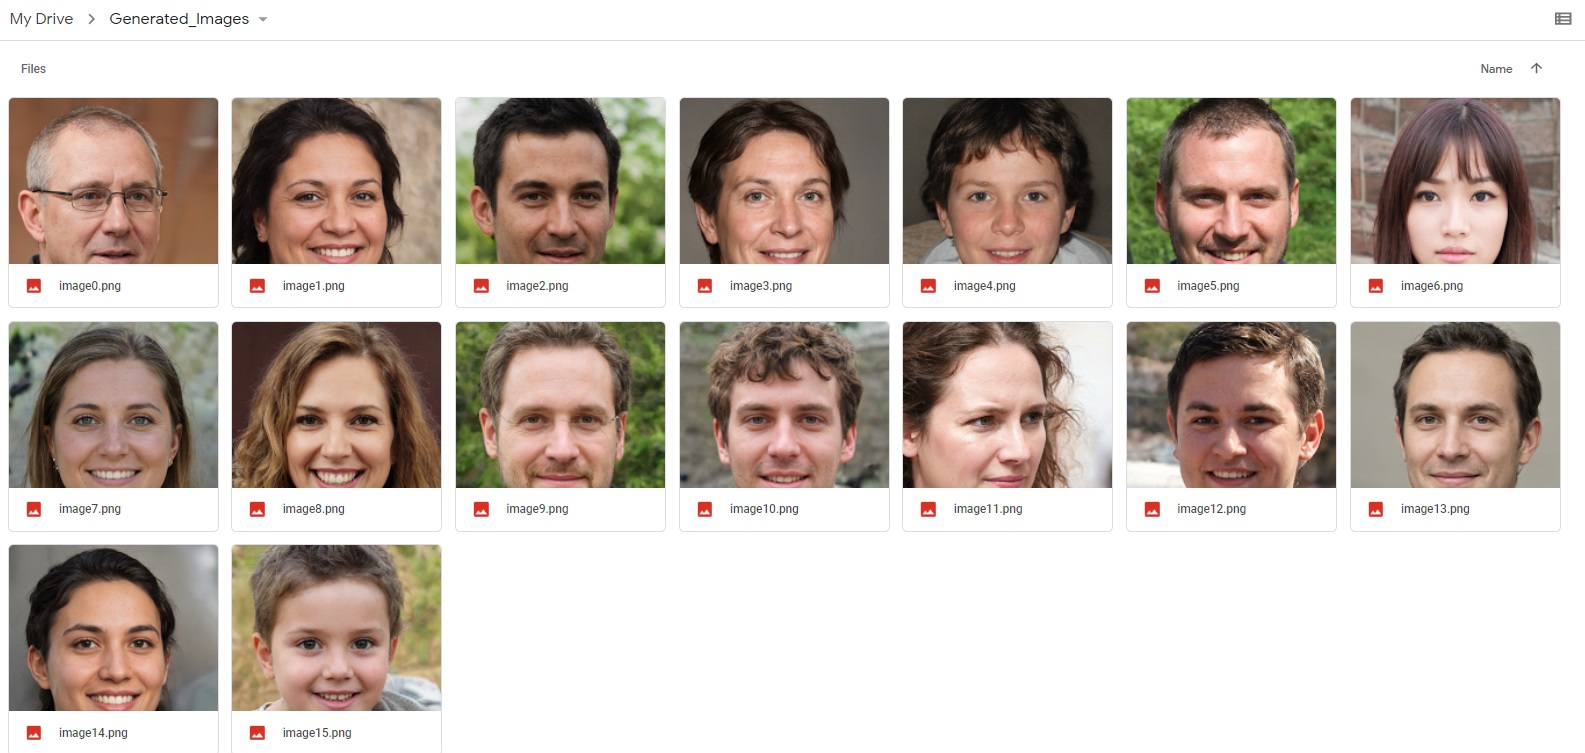

In [ ]:
from IPython.display import Image, display
display(Image('/content/Generated_Images_Python.jpg'))

Now focus on image0.png and image1.png. We will merge these two images to create a set of new images.

To achieve the mixing we use the following code:



In [ ]:
sc = dnnlib.SubmitConfig()
sc.num_gpus = 1
sc.submit_target = dnnlib.SubmitTarget.LOCAL
sc.local.do_not_copy_source_files = True
sc.run_dir_root = "/content/drive/My Drive/Mixed_Generated_Images"
sc.run_desc = 'generate-images'
network_pkl = 'gdrive:networks/stylegan2-ffhq-config-f.pkl'

print('Loading networks from "%s"...' % network_pkl)
_G, _D, Gs = pretrained_networks.load_networks(network_pkl)
vector_size = Gs.input_shape[1:][0]

seeds = expand_seed( [8000+0,8000+1], vector_size)

print(seeds[0].shape)

Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
(1, 512)


Here 8000+0 represents the seed 8000 and 8000+1 represents the seed 8001. Understanding this is crucial. These seeds were used in the beginning of the image generation process and resulted in image0.png and image1.png respectively. These seeds were used to generate so-called latent vectors. In the following code cell we create a set of 20 other latent vectors, which differently weighted averages between the original two latent vectors corresponding to seed 8000 and seed 8001.



For manipulating the images, we need to run the following piece of code. We are free to play with the values listed here, however, this is the tried and tested combination.


In [ ]:
STEPS = 20
diff = seeds[1] - seeds[0]
step = diff / STEPS
current = seeds[0].copy()

seeds2 = []
for i in range(STEPS):
  seeds2.append(current)
  current = current + step

generate_images(Gs, seeds2,truncation_psi=0.5)

Generating image for seed 0/20 ...
Generating image for seed 1/20 ...
Generating image for seed 2/20 ...
Generating image for seed 3/20 ...
Generating image for seed 4/20 ...
Generating image for seed 5/20 ...
Generating image for seed 6/20 ...
Generating image for seed 7/20 ...
Generating image for seed 8/20 ...
Generating image for seed 9/20 ...
Generating image for seed 10/20 ...
Generating image for seed 11/20 ...
Generating image for seed 12/20 ...
Generating image for seed 13/20 ...
Generating image for seed 14/20 ...
Generating image for seed 15/20 ...
Generating image for seed 16/20 ...
Generating image for seed 17/20 ...
Generating image for seed 18/20 ...
Generating image for seed 19/20 ...


We can change the values of steps and diff here and see what changes in result we get. However, with this the result we get is below. Again, it's simply a screenshot from my Google Drive.


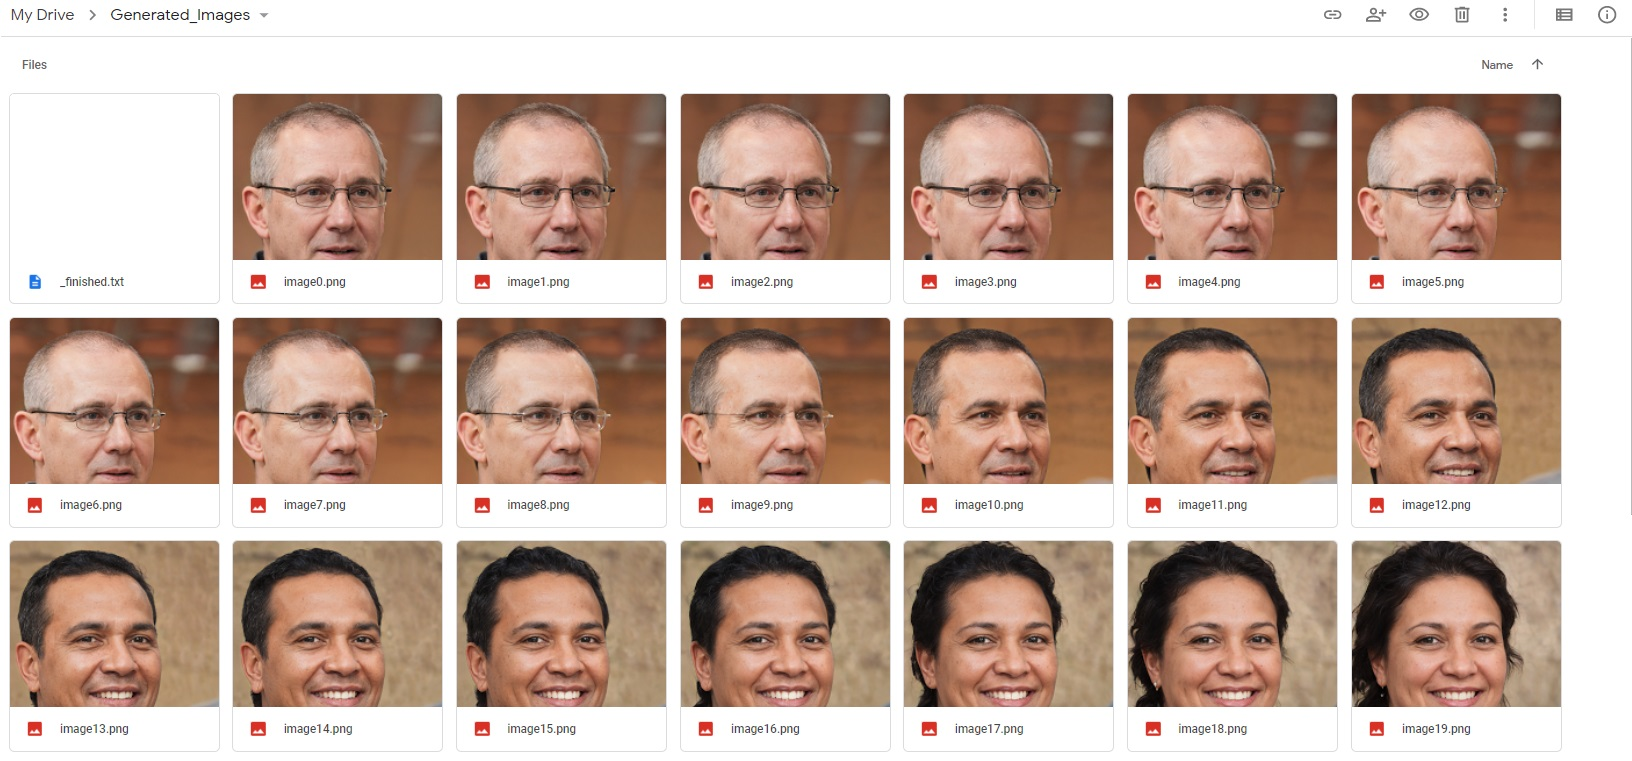

In [ ]:
from IPython.display import Image, display
display(Image('/content/Mixed_Generated_Images.jpg'))

We can clearly see the face of the gentleman slowly converting to the face of this beautiful lady. Cool isn’t it? This is the power of GANs and manipulating latent vectors. We created these by mixing two entirely different image styles. Can you have guessed that all of these images were computer generated? I guess you know, because you are following this tutorial. But what if you show them to your friends? Possibly they will be quite astonished. 

You can take everything we did a step further by curating a custom dataset and training your own version of StyleGAN2 model. However, this would take a considerable amount of time and computing power.

With this we end our tutorial on GAN. We’re pretty hopeful you enjoyed this tutorial. Happy Coding.


**Bonus:** Create a looping GIF.

In [ ]:
import imageio
import glob

filenames = glob.glob("/content/drive/My Drive/Generated_Images/*.png")
filenames_rev = filenames[::-1]
filenames_full = filenames + filenames_rev[1:][:-1]

images = []
for filename in filenames_full:
  images.append(imageio.imread(filename))
#imageio.mimsave('/content/drive/My Drive/Generated_Images/GAN_morph.gif', images, duration=0.07)
imageio.mimsave('/content/drive/My Drive/Generated_Images/GAN_morph_looped_2.gif', images, duration=0.06)